In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import numpy as np
import math
import re

In [301]:
routesDF = pd.read_csv('routes.csv')

df1 = routesDF.copy(True)
start = df1['service_direction_name'].str.extract('(^[A-Z\d]+[a-z\d]*(\s+[A-Z\d]+[a-z\d]*)*)(?:,|to)?')[0]
end = df1['service_direction_name'].str.extract('(?:then |to |and |or |,+\s+and |, | - | –+\s)+([A-Z\d]+[a-z\d]*(\s+[A-Z\d]+[a-z\d]*)*)(?:via.*|\([a-zA-Z]*\)+\s)?$')[0]


df1['start'] = start
df1['end'] = end.combine_first(start)
df1[['start','end']]
# end.isnull().sum()


,start,end
0,Strathfield,Epping
1,Epping,Strathfield
2,Strathfield,Hornsby
3,Hornsby,Strathfield
4,East Hills,Wolli Creek
...,...,...
9555,Juniors Kingsford,Circular Quay
9556,Central Chalmers Street,Moore Park
9557,Moore Park,Central Chalmers Street
9558,Newcastle Interchange,Newcastle Beach


In [271]:
merge = pd.concat([df1['start'], df1['end']]).value_counts()[0:5]
merge = merge.to_frame().rename_axis().reset_index()
merge = merge.rename(columns={'index':'sevice_location', 0:'frequence'})
merge


,sevice_location,frequence
0,St,112
1,Tuggerah Lakes SC,51
2,Central,31
3,Unknown,28
4,Campbelltown Station,27


In [422]:
mot = df1['mot_for_interchange'].value_counts()
mot = mot.to_frame().rename_axis().reset_index()
mot = mot['index'].to_frame()
mot

,index
0,Other
1,Bus
2,Coach
3,Commuter railway
4,Ferry
5,Tram
6,Subway


In [272]:
df1

,operator_name,operator_id,contract_id,my_timetable_route_name,route_variant_type,transport_name_id,transport_name,mot_for_interchange_id,mot_for_interchange,efa_route_name,...,start_date,route_type,frequency_route,gtfs_agency_id,gtfs_route_id_in,gtfs_route_id_out,gtfs_alerts_id,gtfs_alerts_name,start,end
0,train replacement bus operators,700,NaN,1AT9,Temporary,14,Temporary buses,5,Bus,1AT9,...,NaN,714,0,700,700_1AT9,700_1AT9,7,sydneytrains,Strathfield,Epping
1,train replacement bus operators,700,NaN,1AT9,Temporary,14,Temporary buses,5,Bus,1AT9,...,NaN,714,0,700,700_1AT9,700_1AT9,7,sydneytrains,Epping,Strathfield
2,train replacement bus operators,700,NaN,1T9,Temporary,14,Temporary buses,5,Bus,1T9,...,NaN,714,0,700,700_1T9,700_1T9,7,sydneytrains,Strathfield,Epping then Hornsby
3,train replacement bus operators,700,NaN,1T9,Temporary,14,Temporary buses,5,Bus,1T9,...,NaN,714,0,700,700_1T9,700_1T9,7,sydneytrains,Hornsby,Strathfield
4,train replacement bus operators,700,NaN,26T8,Temporary,14,Temporary buses,5,Bus,26T8,...,NaN,714,0,700,700_26T8,700_26T8,7,sydneytrains,East Hills,Wolli Creek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9555,Sydney Light Rail,SLR,NaN,L3,NaN,13,Sydney Light Rail Network,4,Tram,L3 Kingsford Line,...,NaN,900,1,SLR,1001_L3,1001_L3,3,lightrail,Juniors Kingsford to Circular Quay,Circular Quay
9556,Sydney Light Rail,SLR,NaN,LX,NaN,13,Sydney Light Rail Network,4,Tram,LX Special Event Services,...,NaN,900,1,SLR,1001_LX,1001_LX,3,lightrail,Central Chalmers Street to Moore Park,Moore Park
9557,Sydney Light Rail,SLR,NaN,LX,NaN,13,Sydney Light Rail Network,4,Tram,LX Special Event Services,...,NaN,900,1,SLR,1001_LX,1001_LX,3,lightrail,Moore Park to Central Chalmers Street,Central Chalmers Street
9558,Newcastle Transport,NT,NaN,NLR,NaN,21,Newcastle Light Rail Network,4,Tram,NLR,...,NaN,900,1,NT,NT_NLR,NT_NLR,3,lightrail,Newcastle Interchange to Newcastle Beach,Newcastle Beach


In [304]:
df3 = df1.copy(True)
df3.loc[(df3['mot_for_interchange'] == 'Other'), 'transport_name'] = 'Bus'
df3.loc[(df3['mot_for_interchange'] == 'Bus'), 'transport_name'] = 'Bus'
df3.loc[(df3['mot_for_interchange'] == 'Coach'), 'transport_name'] = 'Bus'
df3.loc[(df3['mot_for_interchange'] == 'Commuter railway'), 'transport_name'] = 'Light Rail'
df3.loc[(df3['mot_for_interchange'] == 'Ferry'), 'transport_name'] = 'Ferry'
df3.loc[(df1['mot_for_interchange'] == 'Tram'), 'transport_name'] = 'Train'
df3.loc[(df3['mot_for_interchange'] == 'Subway'), 'transport_name'] = 'Metro'
df3

,operator_name,operator_id,contract_id,my_timetable_route_name,route_variant_type,transport_name_id,transport_name,mot_for_interchange_id,mot_for_interchange,efa_route_name,...,start_date,route_type,frequency_route,gtfs_agency_id,gtfs_route_id_in,gtfs_route_id_out,gtfs_alerts_id,gtfs_alerts_name,start,end
0,train replacement bus operators,700,NaN,1AT9,Temporary,14,Bus,5,Bus,1AT9,...,NaN,714,0,700,700_1AT9,700_1AT9,7,sydneytrains,Strathfield,Epping
1,train replacement bus operators,700,NaN,1AT9,Temporary,14,Bus,5,Bus,1AT9,...,NaN,714,0,700,700_1AT9,700_1AT9,7,sydneytrains,Epping,Strathfield
2,train replacement bus operators,700,NaN,1T9,Temporary,14,Bus,5,Bus,1T9,...,NaN,714,0,700,700_1T9,700_1T9,7,sydneytrains,Strathfield,Hornsby
3,train replacement bus operators,700,NaN,1T9,Temporary,14,Bus,5,Bus,1T9,...,NaN,714,0,700,700_1T9,700_1T9,7,sydneytrains,Hornsby,Strathfield
4,train replacement bus operators,700,NaN,26T8,Temporary,14,Bus,5,Bus,26T8,...,NaN,714,0,700,700_26T8,700_26T8,7,sydneytrains,East Hills,Wolli Creek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9555,Sydney Light Rail,SLR,NaN,L3,NaN,13,Train,4,Tram,L3 Kingsford Line,...,NaN,900,1,SLR,1001_L3,1001_L3,3,lightrail,Juniors Kingsford,Circular Quay
9556,Sydney Light Rail,SLR,NaN,LX,NaN,13,Train,4,Tram,LX Special Event Services,...,NaN,900,1,SLR,1001_LX,1001_LX,3,lightrail,Central Chalmers Street,Moore Park
9557,Sydney Light Rail,SLR,NaN,LX,NaN,13,Train,4,Tram,LX Special Event Services,...,NaN,900,1,SLR,1001_LX,1001_LX,3,lightrail,Moore Park,Central Chalmers Street
9558,Newcastle Transport,NT,NaN,NLR,NaN,21,Train,4,Tram,NLR,...,NaN,900,1,NT,NT_NLR,NT_NLR,3,lightrail,Newcastle Interchange,Newcastle Beach


In [286]:
trans = df3['transport_name'].value_counts()
trans

Bus           9448
Light Rail      54
Ferry           46
Train           10
Metro            2
Name: transport_name, dtype: int64

In [426]:
df4 = df3.copy(True)
df4 = df4['transport_name'].value_counts()
df4 = df4.to_frame().rename_axis().reset_index()
df4 = df4.rename(columns={'index':'transport_name', 'transport_name':'frequency'})
df4 = df4.sort_values(by='frequency', ascending=True)
df4 = df4.set_index([pd.Index([0,1,2,3,4])])
df4

,transport_name,frequency
0,Metro,2
1,Train,10
2,Ferry,46
3,Light Rail,54
4,Bus,9448


In [427]:
df5 = df3[df3['depot_name'].notnull()]
suburbsDF = pd.read_csv('suburbs.csv')
df_5 = suburbsDF.copy(True)
df_5 = df_5[['suburb', 'population']]
df_5 = df_5.groupby(['suburb']).sum().reset_index()
df5 = df5['depot_name'].value_counts()
df5 = df5.to_frame().rename_axis().reset_index()
df5 = df5.rename(columns={'index':'suburb', 'depot_name':'frequency'})
df5 = pd.merge(df5, df_5, on='suburb').rename(columns={'suburb':'depot'})
df5['ratio'] = df5['frequency']/df5['population']
df5 = df5[['depot', 'ratio']].sort_values(by='ratio', ascending=False)[0:5]
df5 = df5.set_index('depot')
df5

,ratio
depot,
Smeaton Grange,21.533333
Brookvale,0.082885
Taren Point,0.080161
Valley Heights,0.080099
Charmhaven,0.072521


In [306]:
df6 = df3.copy(True)
df6 = df6[['operator_name','transport_name']]
df6 = df6.groupby(['operator_name', 'transport_name']).size().unstack(fill_value=0)
df_6 = df6.copy(True)
df6.loc['sum of transport'] = df_6.sum(axis=0)
df6['total transports for each operator'] = df_6.sum(axis=1)
df6['# of transport types for each operator'] = df_6.astype(bool).sum(axis=1)
df6.loc['# of operators for each transport'] = df_6.astype(bool).sum(axis=0)
df6['the most transport for each operator'] = df_6.idxmax(axis=1)
df6.loc['the largest operator for each transport'] = df_6.idxmax(axis=0)
df6

transport_name,Bus,Ferry,Light Rail,Metro,Train,total transports for each operator,# of transport types for each operator,the most transport for each operator
operator_name,,,,,,,,
Allen's Coaches,24.0,0.0,0.0,0.0,0.0,24.0,1.0,Bus
Atwal Bus,16.0,0.0,0.0,0.0,0.0,16.0,1.0,Bus
BNA Buses,22.0,0.0,0.0,0.0,0.0,22.0,1.0,Bus
Baldwin's Bus Service,8.0,0.0,0.0,0.0,0.0,8.0,1.0,Bus
Ballina Buslines,10.0,0.0,0.0,0.0,0.0,10.0,1.0,Bus
...,...,...,...,...,...,...,...,...
Wingham Buslines,5.0,0.0,0.0,0.0,0.0,5.0,1.0,Bus
train replacement bus operators,51.0,0.0,0.0,0.0,0.0,51.0,1.0,Bus
sum of transport,9448.0,46.0,54.0,2.0,10.0,NaN,NaN,NaN


In [519]:
table = pd.pivot_table(df6, index=[df6.index.name], columns=[df6.columns.name])
table

KeyError: 'transport_name'

In [504]:
import pandas as pd
import numpy as np

# creating a dataframe
df = pd.DataFrame({'A': ['John', 'Boby', 'Mina', 'Peter', 'Nicky'],
      'B': ['Masters', 'Graduate', 'Graduate', 'Masters', 'Graduate'],
      'C': [27, 23, 21, 23, 24]})

df

,A,B,C
0,John,Masters,27
1,Boby,Graduate,23
2,Mina,Graduate,21
3,Peter,Masters,23
4,Nicky,Graduate,24


In [507]:
table = pd.pivot_table(df, index =['A', 'B','C'])

table

,,
A,B,C
Boby,Graduate,23
John,Masters,27
Mina,Graduate,21
Nicky,Graduate,24
Peter,Masters,23


No handles with labels found to put in legend.


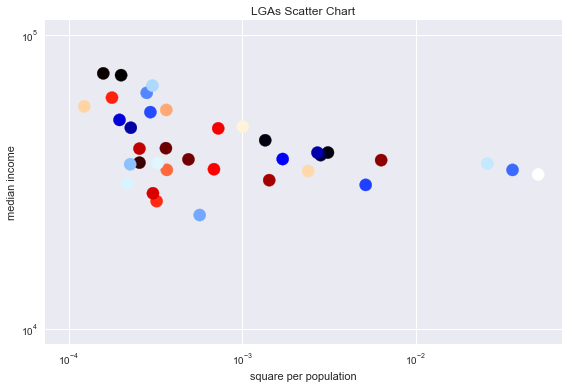

In [365]:
suburbsDF = pd.read_csv('suburbs.csv')
df7 = suburbsDF.copy(True)
df7 = df7[df7['state'] == 'NSW']
df7 = df7[df7['statistic_area'] == 'Greater Sydney']
df7 = df7[['local_goverment_area', 'population', 'median_income', 'sqkm']]
df7 = df7.groupby(['local_goverment_area']).mean().reset_index()
LGA = df7['local_goverment_area'].tolist()

median_income = df7['median_income'].tolist()
population = df7['population'].tolist()
sqkm = df7['sqkm'].tolist()
np.seterr(divide='ignore', invalid='ignore')
area_per_population = np.divide(np.array(sqkm), np.array(population)).tolist()
for i in range(len(area_per_population)):
    if area_per_population[i]==float('inf'): area_per_population[i] = 0.0001
color = np.arange(len(LGA)).tolist()

colorlist = {LGA[i]:color[i] for i in range(len(LGA))}
# for legend, c in color.items():
#     plt.scatter([],[],c=c,s=100,label=legend)

plt.style.use('seaborn')
# for legend, c in colorlist.items():
#     plt.scatter(area_per_population, median_income, s=150, c=c, cmap='flag', label=legend)
plt.scatter(area_per_population, median_income, s=150, c=np.arange(len(LGA)), cmap='flag')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('square per population')
plt.ylabel('median income')
plt.title('LGAs Scatter Chart')
plt.tight_layout()

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [277]:
plt.savefig("z5342276-Q7.png")

<Figure size 576x396 with 0 Axes>

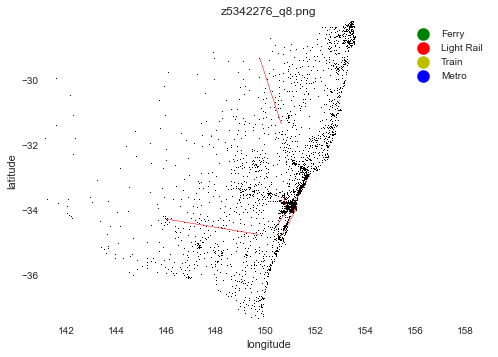

In [303]:
suburbsDF = pd.read_csv('suburbs.csv')
df8 = suburbsDF.copy(True)
df8 = df8[df8['state'] == 'NSW']
lng = df8['lng']
lat = df8['lat']

plt.hist2d(lng, lat, weights=df8['sqkm'], bins=500)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.clim(0, 1)
df8 = df8[['suburb', 'lng', 'lat']]
df_8 = df3[df3['start'].isin(df8['suburb']) & df3['end'].isin(df8['suburb'])]
df_8 = df_8[['transport_name', 'start', 'end']]
df_8 = df_8.rename(columns={'start': 'suburb'})
df_8 = pd.merge(df_8, df8, on='suburb').rename(columns={'suburb': 'start'})
df_8 = df_8.rename(columns={'end': 'suburb'})
df_8 = pd.merge(df_8, df8, on='suburb').rename(columns={'suburb': 'end'})
df8 = df_8[df_8['transport_name'] != 'Bus'].reset_index()
df8 = df8[['transport_name', 'lng_x', 'lng_y', 'lat_x', 'lat_y']]

z = df8.values.tolist()
for i in range(len(z)):
    z[i] = [z[i][0], [z[i][1], z[i][2]], [z[i][3], z[i][4]]]
c = {'Ferry': 'g', 'Light Rail': 'r', 'Train': 'y', 'Metro': 'b'}
for i in range(len(z)):
    plt.plot(z[i][1], z[i][2], color=c[z[i][0]], linewidth=0.3)
for legend, c in c.items():
    plt.scatter([], [], label=legend, c=c, s=150)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('z5342276_q8.png')
plt.show()

SyntaxError: invalid syntax (164335470.py, line 2)